<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Template Matching
**cv.matchTemplate()** dengan parameter
- image: citra input
- tempt: template yang dicari, ukurannya tidak boleh lebih besar dari citra input.
- method: metode dari template matching.

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

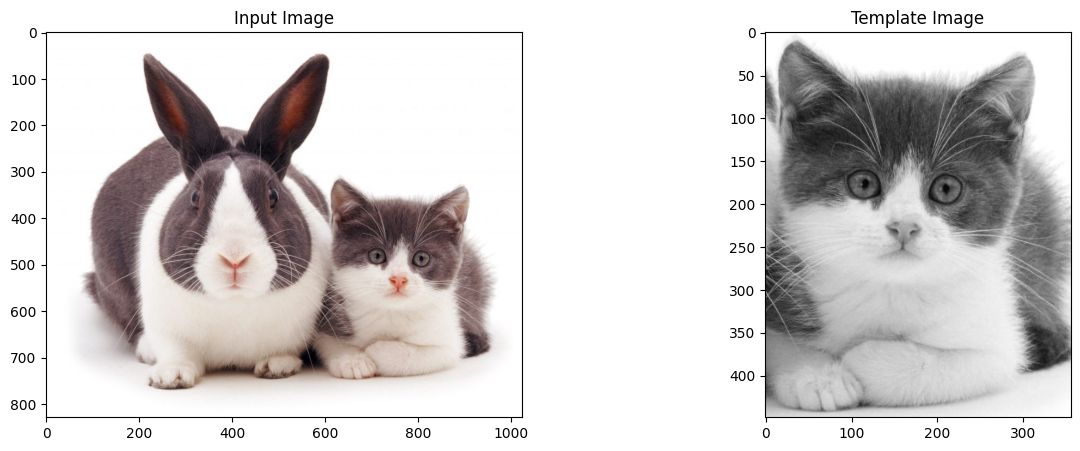

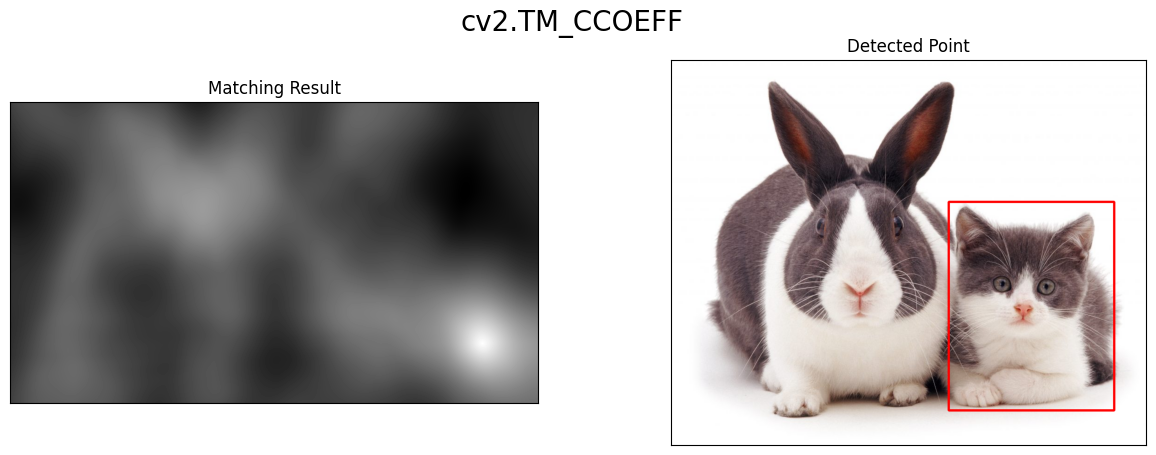

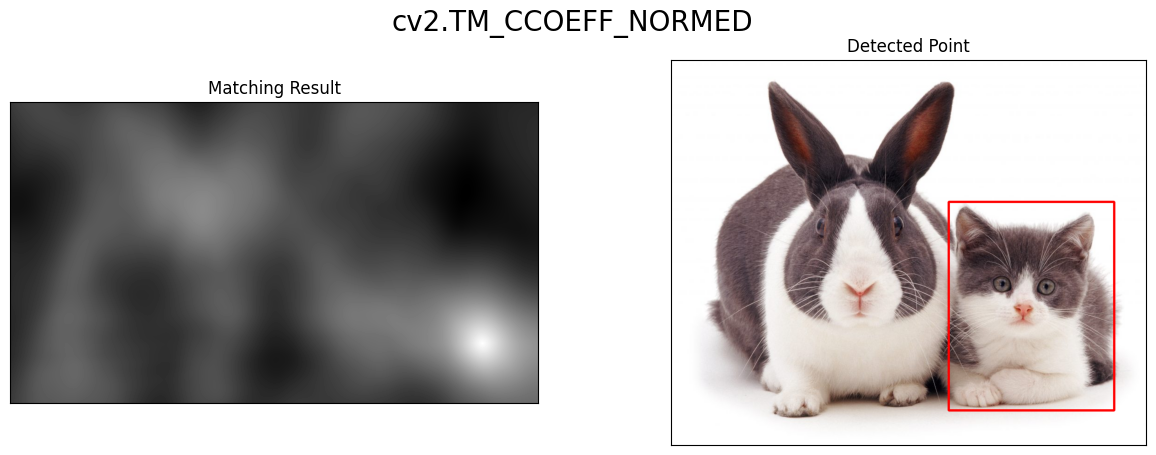

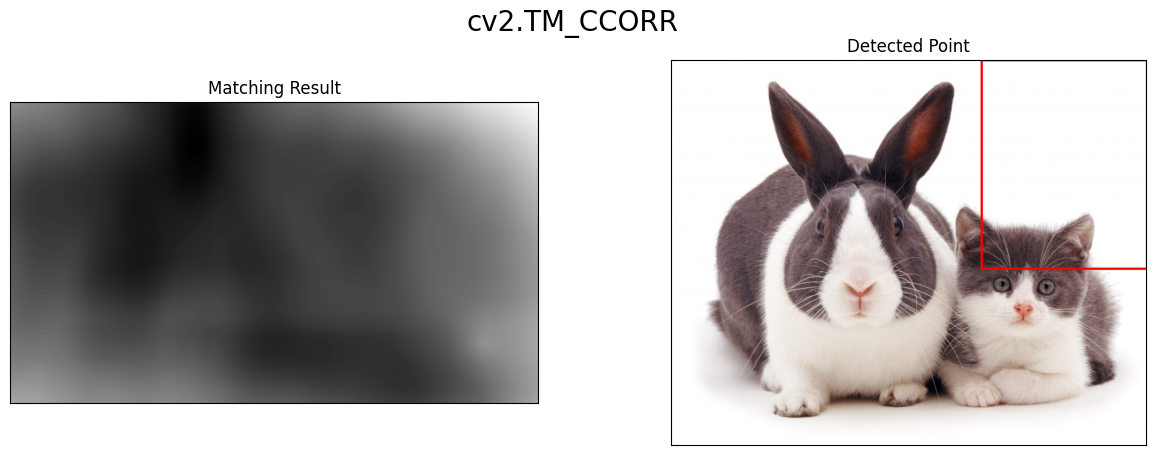

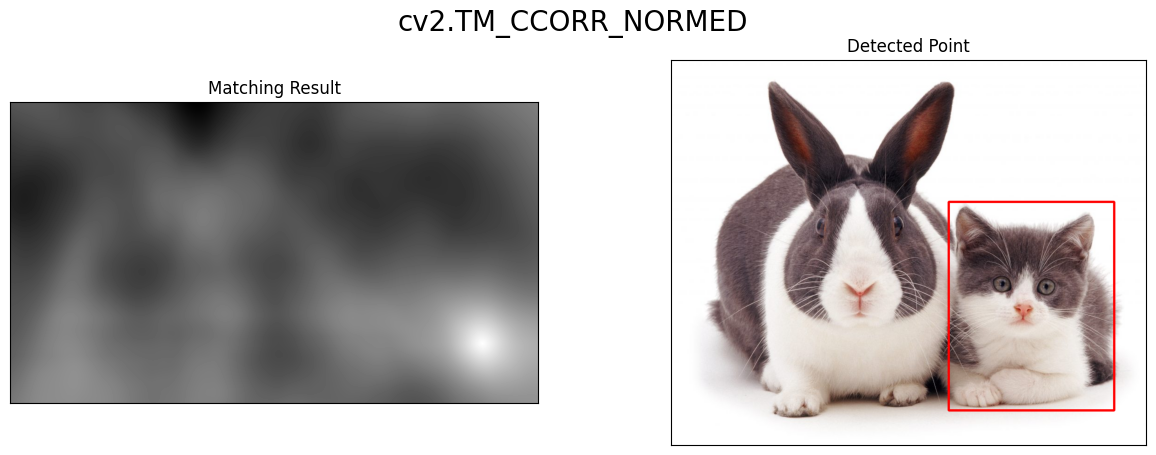

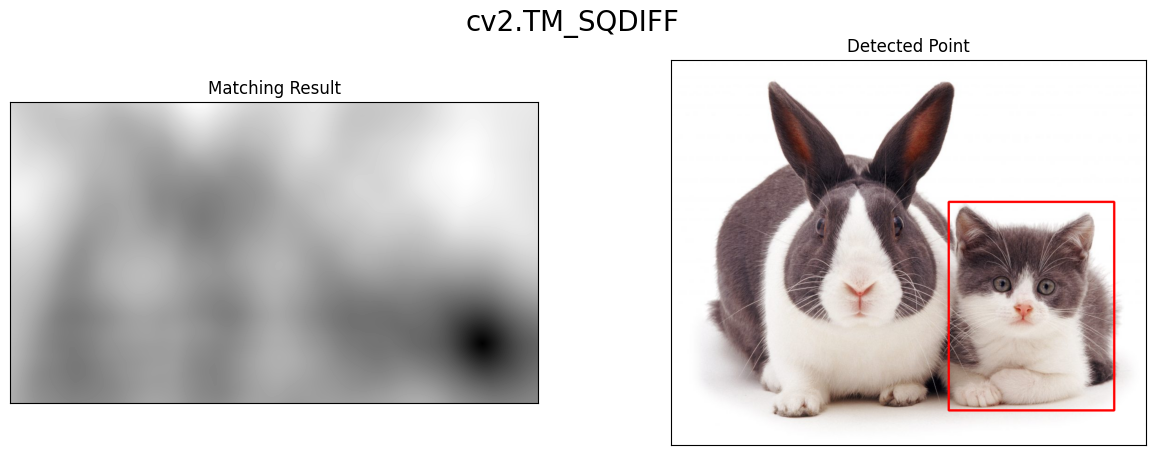

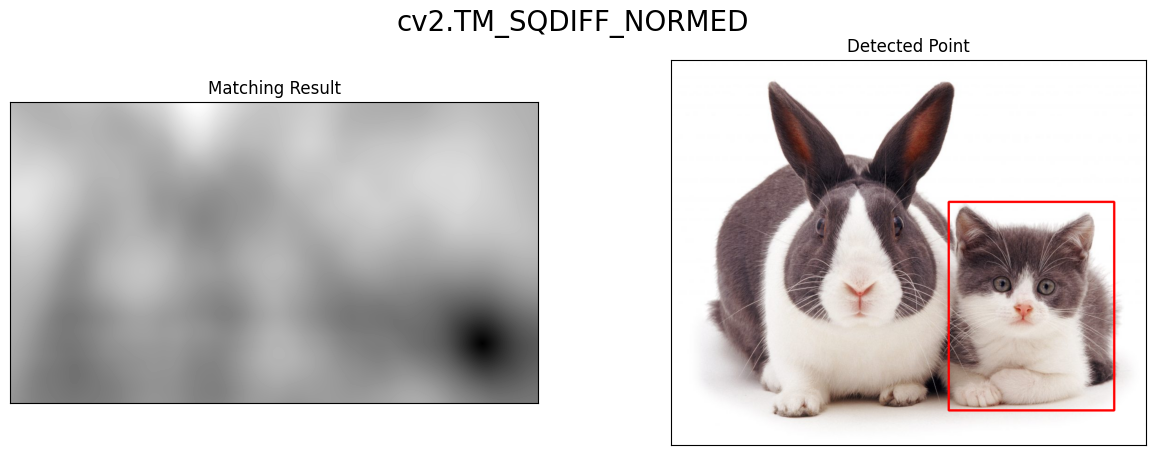

In [12]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img.copy()

template = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Input Image")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Template Image")

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    res = cv2.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, (0, 0, 255), 3)

    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)

    plt.show()

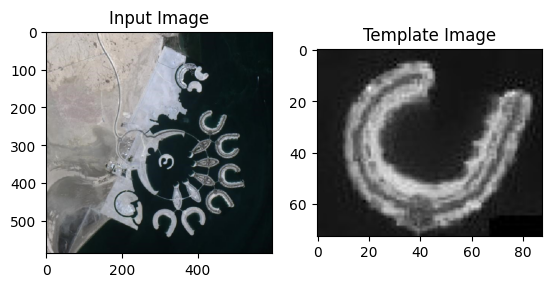

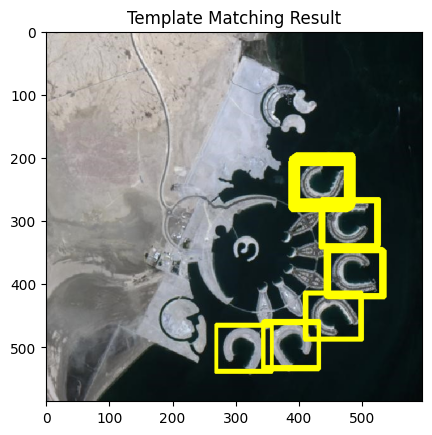

In [15]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(122)
plt.imshow(template, cmap='gray')
plt.title('Template Image')

w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.43

loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Template Matching Result')

plt.show()

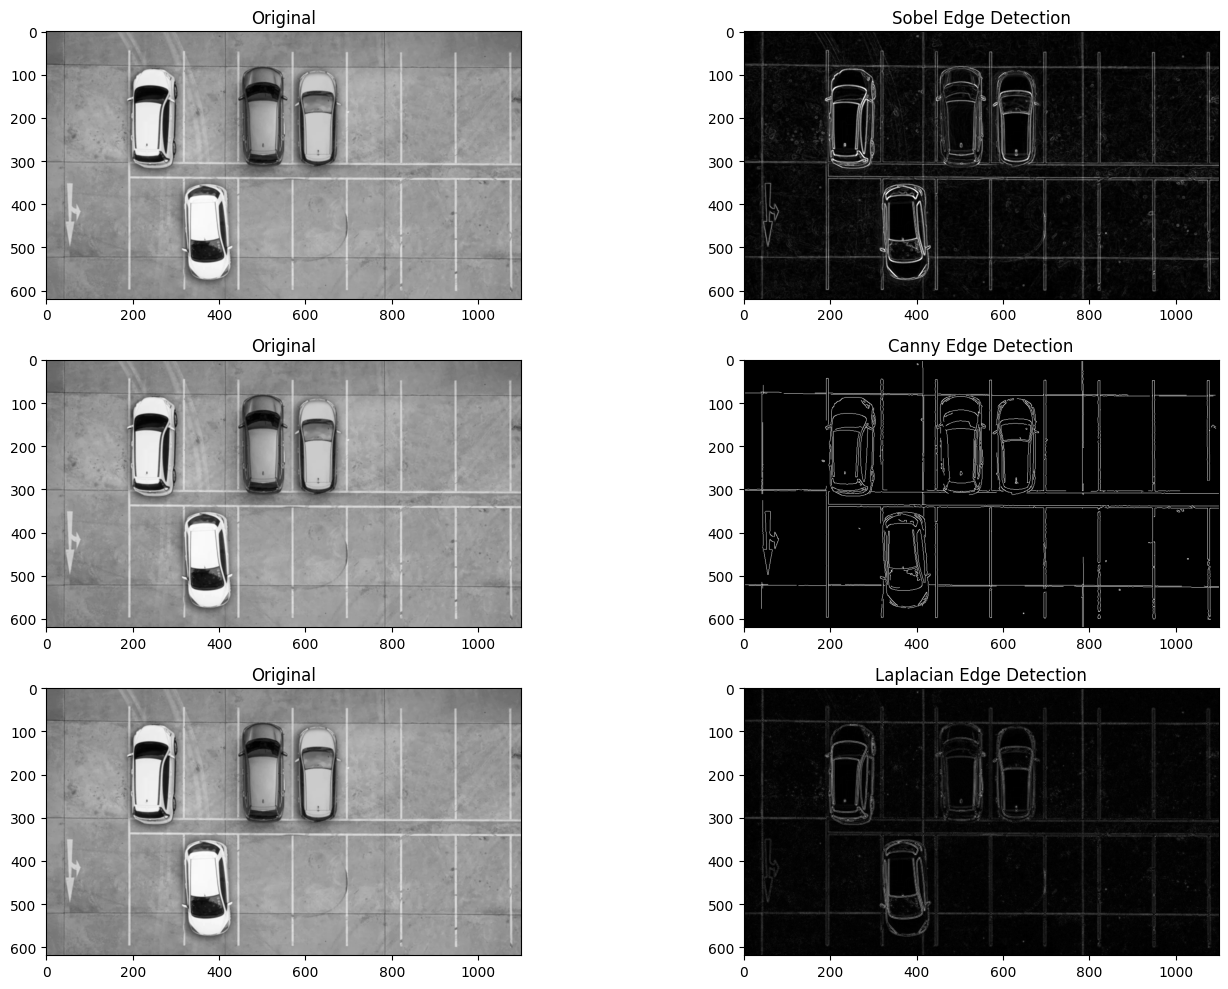

In [19]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
img_sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(img_sobelx), 0.5, cv2.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv2.Canny(img, 100, 200)

img_laplacian = cv2.Laplacian(img, cv2.CV_64F)
img_laplacian = cv2.convertScaleAbs(img_laplacian)

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].imshow(img, cmap='gray', aspect='equal')
axes[0, 0].set_title('Original')

axes[0, 1].imshow(img_sobelxy, cmap='gray', aspect='equal')
axes[0, 1].set_title('Sobel Edge Detection')

axes[1, 0].imshow(img, cmap='gray', aspect='equal')
axes[1, 0].set_title('Original')

axes[1, 1].imshow(edges_canny, cmap='gray', aspect='equal')
axes[1, 1].set_title('Canny Edge Detection')

axes[2, 0].imshow(img, cmap='gray', aspect='equal')
axes[2, 0].set_title('Original')

axes[2, 1].imshow(img_laplacian, cmap='gray', aspect='equal')
axes[2, 1].set_title('Laplacian Edge Detection')

plt.tight_layout()
plt.show()

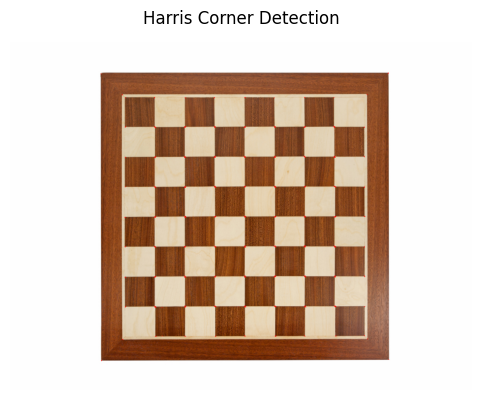

In [20]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corner_harris = cv2.cornerHarris(gray, 2, 3, 0.04)

threshold = 0.01 * corner_harris.max()
img[corner_harris > threshold] = [0, 0, 255]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

<ipython-input-22-2cff21eaa241>:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


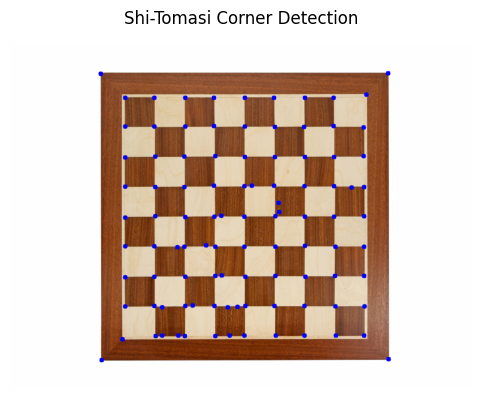

In [22]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, 255, -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


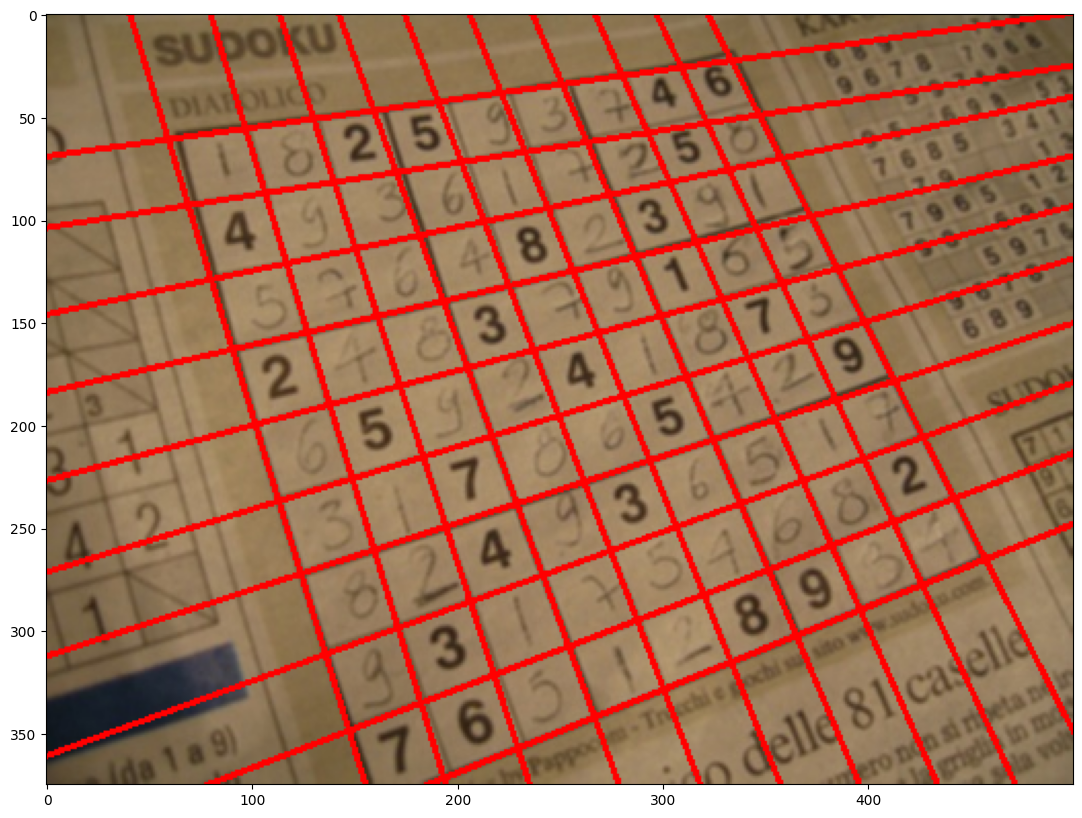

In [23]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv2.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv2.erode (edges, kernel, iterations = 1)

lines = cv2.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

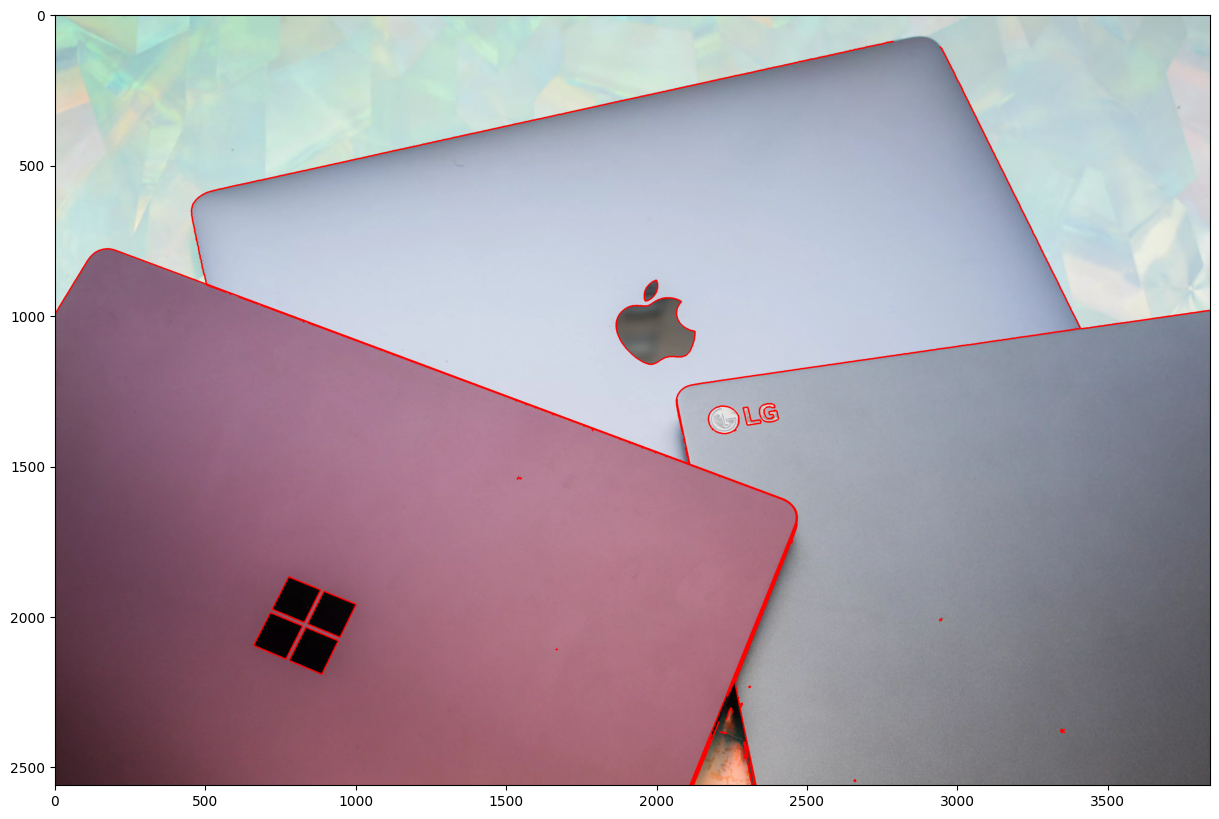

In [26]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(img_gray, 30, 200)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

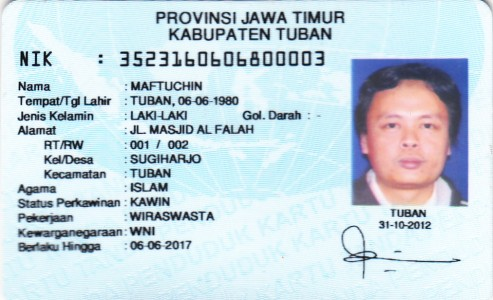

In [27]:
import cv2
from google.colab.patches import cv2_imshow
import os

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More/ktp3.png')
cv2_imshow(img)

In [28]:
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More"
img = "ktp3.png"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, img))
    blurred = src.copy()
    gray = blurred.copy()

In [29]:
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

168.0 (300, 493)


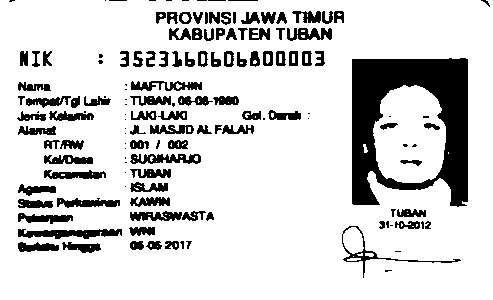

In [30]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
cv2_imshow(bw)

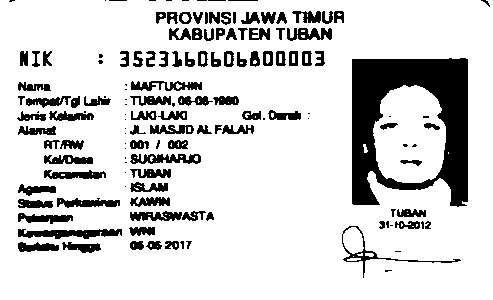

In [31]:
# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

# Display the result after morphological operations
cv2_imshow(bw_opened)

168.0 (300, 493)


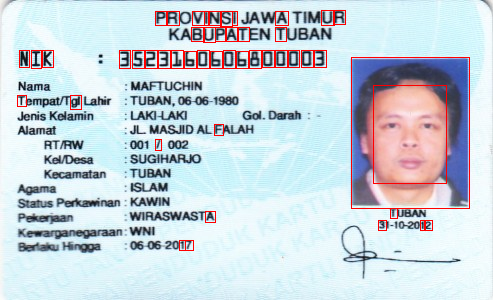

In [34]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More"
img = "ktp3.png"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, img))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(src)

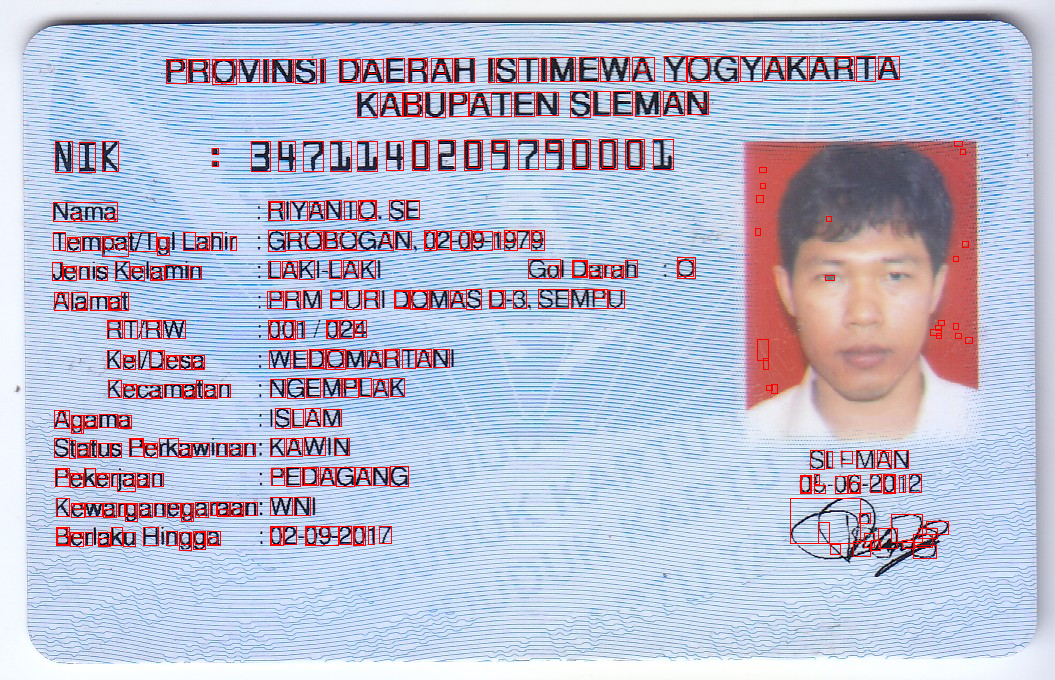

In [37]:
ktp = cv2.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/KTP_More/ktp.png")

# Convert the image to grayscale
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0.5)

# Apply thresholding to create a binary image
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
bw_opened = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

# Find contours in the processed binary image
contours, hierarchy = cv2.findContours(bw_opened, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around contours that likely represent text
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / h

    # Modify the size and aspect ratio conditions to detect smaller text contours
    if 5 <= w <= 200 and 5 <= h <= 50 and 0.2 <= aspect_ratio <= 5.0:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display the image with contours marked
cv2_imshow(ktp)